In [13]:
import os
import sys
sys.path.insert(0, '../')
import ccal
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

import numpy as np
import pandas as pd

# Get states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
n_states_to_explore = [9, 12]
nclustering = 3
states_filename = 'n_state_x_samples.txt'

In [3]:
# labels, cophenetic_correlation = ccal.analyze.get_states_from_h(h, n_states_to_explore, nclustering=nclustering, filename=states_filename)

# Map Onco GPS

In [4]:
n_state = 12
figure_filename='onco_gps.pdf'

labels = pd.read_csv(states_filename, index_col=0, sep='\t')
states = labels.ix[n_state, :-1].astype(int).tolist()
annotations = np.random.random_sample(len(states))

In [18]:
s = pd.Series(annotations)

In [20]:
s.name = 'BLAH'

In [22]:
s

0      0.177533
1      0.894299
2      0.413945
3      0.530844
4      0.825198
5      0.484811
6      0.660226
7      0.091260
8      0.722620
9      0.166399
10     0.625603
11     0.834161
12     0.804961
13     0.794641
14     0.430870
15     0.804672
16     0.236957
17     0.947952
18     0.377378
19     0.423383
20     0.408686
21     0.822815
22     0.497245
23     0.870454
24     0.892935
25     0.042385
26     0.613664
27     0.299876
28     0.211378
29     0.671346
         ...   
136    0.323559
137    0.957593
138    0.890723
139    0.680310
140    0.412519
141    0.750079
142    0.890778
143    0.386129
144    0.215297
145    0.603036
146    0.933853
147    0.790630
148    0.165444
149    0.190275
150    0.650544
151    0.917809
152    0.045394
153    0.586212
154    0.882333
155    0.778114
156    0.391876
157    0.330781
158    0.798602
159    0.537419
160    0.218775
161    0.061142
162    0.708365
163    0.168437
164    0.015003
165    0.035191
Name: BLAH, dtype: float

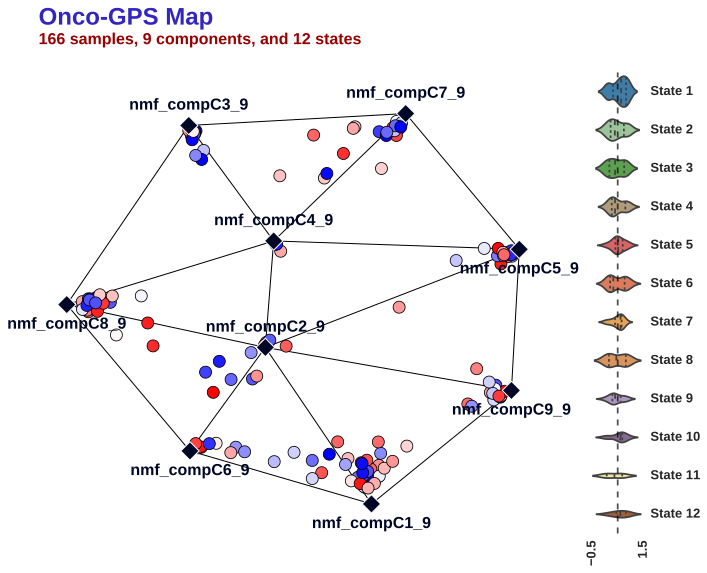

In [15]:
ccal.visualize.plot_onco_gps(h, n_state, states, annotations=annotations, output_filename=figure_filename, contour=False, background=False, effect_plot_type='violine')

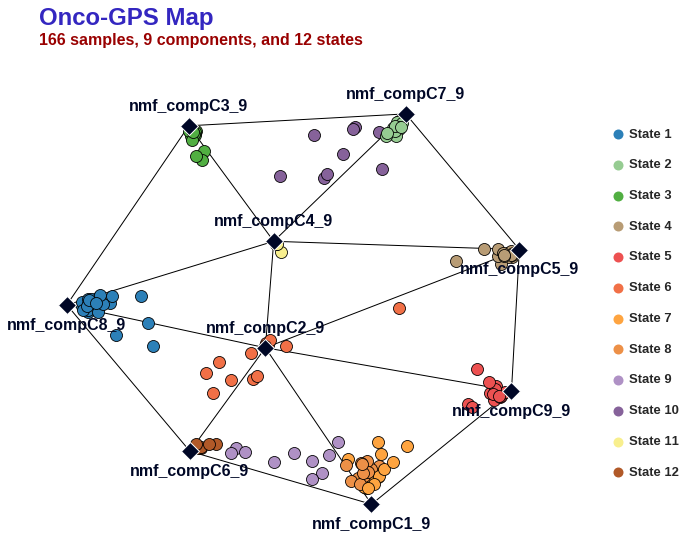

In [6]:
ccal.visualize.plot_onco_gps(h, n_state, states, output_filename=figure_filename, contour=False, background=False, effect_plot_type='box')

In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
CMAP_CATEGORICAL = ccal.visualize.CMAP_CATEGORICAL

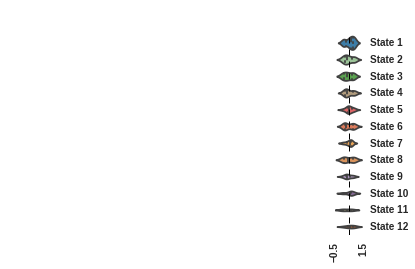

In [9]:
gridspec = mpl.gridspec.GridSpec(10, 10)
ax_title = plt.subplot(gridspec[0, :])
ax_title.axis('off')
ax_map = plt.subplot(gridspec[1:, :9])
ax_map.axis('off')
ax_legend = plt.subplot(gridspec[1:, 9:])
ax_effect = ax_legend
palette = {}
for s in set(states):
    palette[s] = CMAP_CATEGORICAL(int(s / n_state * CMAP_CATEGORICAL.N))
sns.violinplot(x=annotations, y=states, scale='count', palette=palette, inner='quartile', orient='h', ax=ax_effect)
ax_effect.set_yticklabels(['State {}'.format(s) for s in sorted(set(states))], weight='bold')
ax_effect.yaxis.tick_right()
xticklabels = ax_legend.get_xticklabels()
for i, t in enumerate(xticklabels):
    if i == 0 or i == len(xticklabels) - 1:
        t.set(rotation=90)
        t.set(weight='bold')
    else:
        t.set(visible=False)
        
ax_legend.patch.set_visible(False)
for s in ax_legend.spines.values():
    s.set(visible=True)
ax_legend.axvline(np.mean(annotations), color='k', lw=1, ls="--", label='a')
# sns.despine(ax=ax_legend)

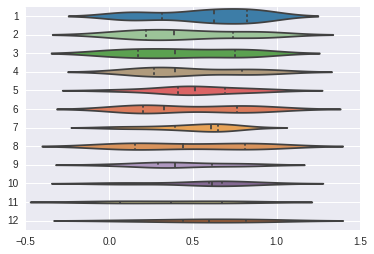

In [10]:
a = sns.violinplot(x=annotations, y=states, scale='count', palette=palette, inner='quartile', orient='h')
a.grid(True)